In [1]:
import pandas as pd
import numpy as numpy

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Question 1 
Benedrix, a machine tool company in interested in understand the impact of machine hours and production run, on its overhead cost.
The data on a monthly basis for 3 years is provided in the dataset: MLR_FactoryOverhead.csv
Fit the regression equations:
• Overhead = F (machine hours)
• Overhead = F (production runs)
• Overhead = F (machine hours, production runs)
1) Find the R-Squared in all 3 cases.
2) How would you explain the additional lift in R-squared of the combined model vs each of the individual model?

In [2]:
FactoryOverhead_df=pd.read_csv('MLR_FactoryOverhead.csv')
FactoryOverhead_df=FactoryOverhead_df.set_index(['Month'])
FactoryOverhead_df.sample(10)


,Machine Hours,Production Runs,Overhead Cost
Month,,,
5,1500,35,106968
31,1124,36,88371
24,1420,42,105752
12,1376,37,88730
10,1516,21,88738
18,1104,44,91892
4,1355,22,82262
27,1433,58,113137
35,1413,30,88032


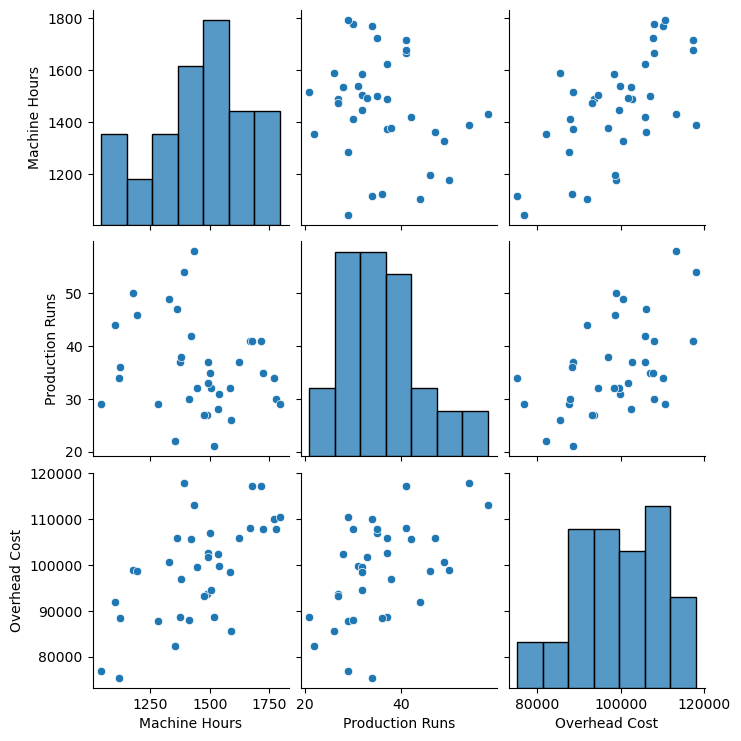

In [3]:
sns.pairplot(data=FactoryOverhead_df)

Text(0.5, 1.0, 'Machine Hours vs Overhead Cost')

<Figure size 1200x800 with 0 Axes>

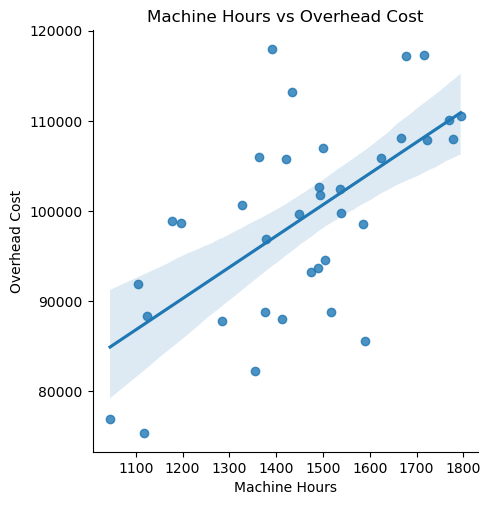

In [4]:
plt.figure(figsize=(12, 8))

sns.lmplot(x='Machine Hours', y='Overhead Cost', data=FactoryOverhead_df)

plt.title('Machine Hours vs Overhead Cost')

Text(0.5, 1.0, 'Production Runs vs Overhead Cost')

<Figure size 1200x800 with 0 Axes>

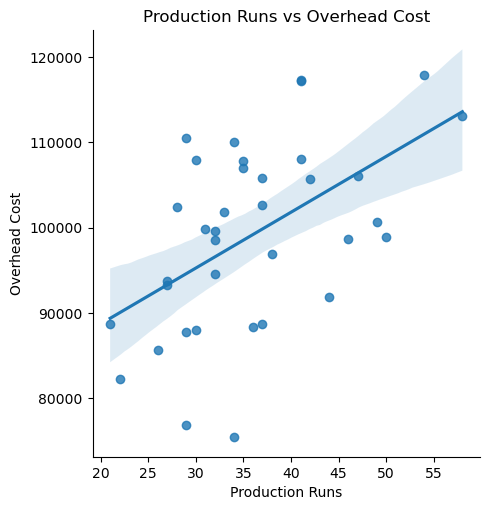

In [5]:
plt.figure(figsize=(12, 8))

sns.lmplot(x='Production Runs', y='Overhead Cost', data=FactoryOverhead_df)

plt.title('Production Runs vs Overhead Cost')

In [6]:
#Question _1_1
slope_MH, intercept_MH, r_value_MH, _, _ ,= stats.linregress(FactoryOverhead_df['Machine Hours'],FactoryOverhead_df['Overhead Cost'])

print(f'slope_MH:{slope_MH}')
print(f'Intercept_MH:{intercept_MH}')
print(f'R2_MH:{r_value_MH**2}')

print('//---------------//')

slope_PR, intercept_PR, r_value_PR, _, _ ,= stats.linregress(FactoryOverhead_df['Production Runs'],FactoryOverhead_df['Overhead Cost'])

print(f'slope_PR:{slope_PR}')
print(f'Intercept_PR:{intercept_PR}')
print(f'R2_PR:{r_value_PR**2}')

print('//---------------//')
X = FactoryOverhead_df.drop(['Overhead Cost'], axis=1)
X=sm.add_constant(X)
y = FactoryOverhead_df['Overhead Cost']

reg_model = sm.OLS(y, X).fit()

print(reg_model.params)
print(reg_model.summary())

slope_MH:34.7022364208012
Intercept_MH:48621.35463393337
R2_MH:0.3992780530435396
//---------------//
slope_PR:655.0706601982704
Intercept_PR:75605.5157139844
R2_PR:0.2709655638064029
//---------------//
const              3996.678209
Machine Hours        43.536398
Production Runs     883.617925
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          Overhead Cost   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     107.0
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           3.75e-15
Time:                        18:26:06   Log-Likelihood:                -349.07
No. Observations:                  36   AIC:                             704.1
Df Residuals:                      33   BIC:                             708.9
Df Model:                           2                   

In [7]:
#Question 1_2 

# The R-Square combined will continue to increse with two variables together , in comparision to when done one variable at a time.  

### Q2. MLR with categorical variables – Courier Service
GoKart is a regional delivery service company providing different types of package delivery services. An analyst wants to estimate the cost of shipping a package as function of cargo type.
Cost of 15 randomly chosen packages of approximately the same weight, shipped to almost similar distance, is provided in the file: MLR_CourierService.csv
1) Estimate the appropriate multiple linear regression equation to predict the cost of shipping a package.
2) Provide interpretation for the regression coefficients.
3) Which cargo type is the costliest? Which one is least costly?
4) How well does the regression fit the sample data? How can the goodness of fitness be improved?
5) Predict the cost of shipping a package with semi-fragile cargo.

In [8]:
CourierService_df=pd.read_csv('MLR_CourierService.csv')
CourierService_df=CourierService_df.set_index(['Shipment'])
CourierService_df.sample(10)


,CargType,CosoShipment
Shipment,,
7,Semifragile,138.0
1,Semifragile,84.0
10,Durable,25.2
13,Durable,90.0
3,Fragile,165.6
4,Fragile,133.2
11,Fragile,130.8
6,Fragile,206.4
2,Durable,24.0


<AxesSubplot:title={'center':'CosoShipment'}, xlabel='CargType'>

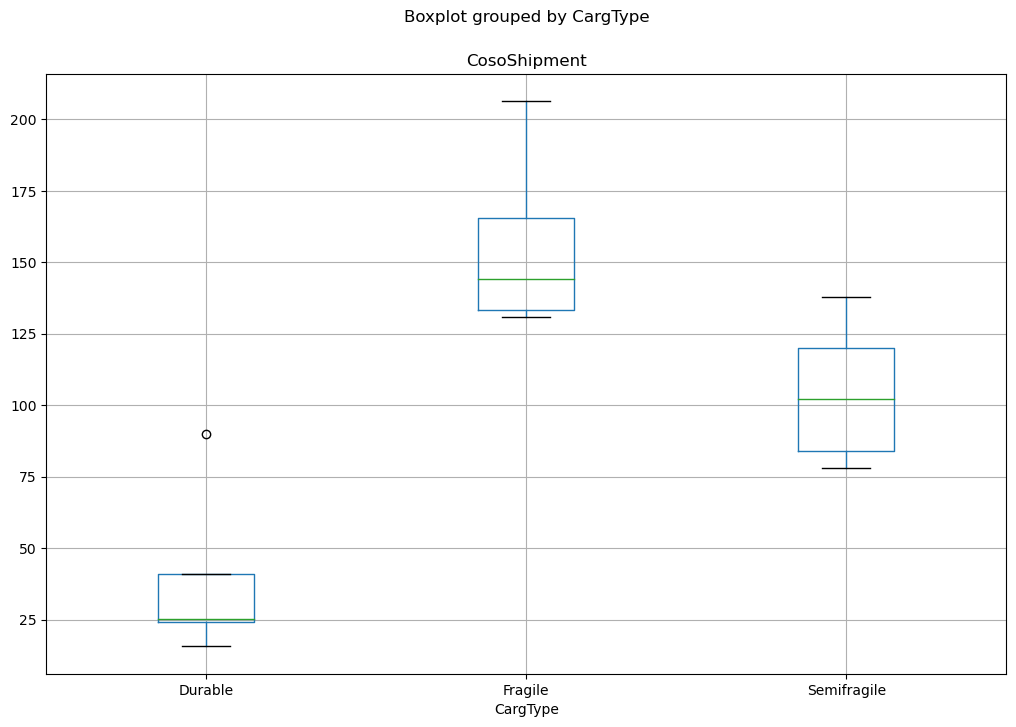

In [9]:
CourierService_df.boxplot(column=['CosoShipment'], by='CargType', figsize=(12, 8))

In [10]:
CourierService_df.groupby('CargType')['CosoShipment'].mean()

CargType
Durable         39.12
Fragile        156.00
Semifragile    104.40
Name: CosoShipment, dtype: float64

In [11]:
# we are doing dummy encoding  on CargType

result = ols('CosoShipment ~ C(CargType)', data = CourierService_df).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           CosoShipment   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     20.61
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           0.000132
Time:                        18:26:06   Log-Likelihood:                -70.043
No. Observations:                  15   AIC:                             146.1
Df Residuals:                      12   BIC:                             148.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

C:\Users\sbiswal\Miniconda3\envs\dsbootcamp\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [12]:
#Q2  Regression Interpretaion
#meancost_durable
#meancost_fragie= meancost_durable + 116.88 (first coeiffcient )
#meancost_semifragile=meancost_durable +104.40 (Second coeiffcient)


#Q2_ 3 Fragile cargo is the costiliest , durable  cargo is the least costly. 

#Q2_4   the R square value is 74% - a very good fit. There are outliers in the durable shipment data , by removing that we can improve Goodness of Fit.

#Q2_5 meancost_semifragile=meancost_durable +104.40 (Second coeiffcient)

### Q3: MLR with multiple variables – Employee Salary
An HR analyst in Unitech Pvt Ltd, wants to predict the annual salaries of given employees using the potential explanatory variables in the file MLR_EmpSalary.csv
1) Estimate the appropriate multiple linear regression equation to predict the salary of an Unitech employee using all explanatory variables.
2) Do we need to exclude certain columns? Why?
3) Which department employees are paid the highest? By how much?
4) Do you see any discrimination in salaries earned by male and female employees?
5) What would be the estimated salary of a Data Scientist (joining engineering) with 10 years of work experience. This woman has 18 years of total education, and will be supervising 4 junior employees.

In [13]:
EmpSalary_df=pd.read_csv('MLR_EmpSalary.csv')
EmpSalary_df=EmpSalary_df.set_index(['Employee'])
EmpSalary_df.sample(10)


,Salary,PreviousExp,YearsEmployed,YearsEducation,DirectRepotees,Female,Male,Engineering,Sales,Other
Employee,,,,,,,,,,
17,"$36,578",4,4,18,8,1,0,0,0,1
11,"$23,654",0,0,10,2,0,1,0,0,1
43,"$56,326",3,12,18,6,1,0,0,0,1
27,"$53,234",0,25,16,3,1,0,0,0,1
13,"$36,512",6,6,14,2,0,1,1,0,0
16,"$35,468",5,9,14,5,0,1,0,0,1
34,"$28,985",1,0,14,4,0,1,0,1,0
24,"$29,876",0,2,13,5,0,1,0,0,1
42,"$36,571",1,6,14,2,1,0,0,0,1


In [14]:
EmpSalary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 1 to 46
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Salary          46 non-null     object
 1   PreviousExp     46 non-null     int64 
 2   YearsEmployed   46 non-null     int64 
 3   YearsEducation  46 non-null     int64 
 4   DirectRepotees  46 non-null     int64 
 5   Female          46 non-null     int64 
 6   Male            46 non-null     int64 
 7   Engineering     46 non-null     int64 
 8   Sales           46 non-null     int64 
 9   Other           46 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 4.0+ KB


In [15]:
# Total experice should be more relevant

EmpSalary_df['Tot Exp']=EmpSalary_df['PreviousExp']+EmpSalary_df['YearsEmployed']
EmpSalary_df.drop(['PreviousExp','YearsEmployed'],axis=1,inplace=True)


In [16]:
EmpSalary_df.sample(10)

,Salary,YearsEducation,DirectRepotees,Female,Male,Engineering,Sales,Other,Tot Exp
Employee,,,,,,,,,
28,"$51,698",16,1,1,0,1,0,0,24
22,"$34,632",14,0,1,0,1,0,0,9
30,"$38,791",15,9,1,0,0,1,0,25
29,"$41,889",17,7,1,0,0,1,0,38
36,"$54,679",16,4,0,1,0,0,1,23
9,"$29,548",11,0,1,0,0,1,0,11
18,"$39,828",15,5,0,1,0,1,0,24
40,"$26,578",12,2,0,1,0,0,1,6
5,"$34,869",14,1,0,1,1,0,0,12


In [17]:
EmpSalary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 1 to 46
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Salary          46 non-null     object
 1   YearsEducation  46 non-null     int64 
 2   DirectRepotees  46 non-null     int64 
 3   Female          46 non-null     int64 
 4   Male            46 non-null     int64 
 5   Engineering     46 non-null     int64 
 6   Sales           46 non-null     int64 
 7   Other           46 non-null     int64 
 8   Tot Exp         46 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 3.6+ KB


In [18]:
EmpSalary_df['Salary_replace'] = EmpSalary_df['Salary'].str.replace('$', '').str.replace(',','')
EmpSalary_df['Salary_replace'] = pd.to_numeric(EmpSalary_df['Salary_replace'])


C:\Users\sbiswal\AppData\Local\Temp\ipykernel_28516\467924983.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  EmpSalary_df['Salary_replace'] = EmpSalary_df['Salary'].str.replace('$', '').str.replace(',','')


In [19]:
EmpSalary_df=EmpSalary_df.drop(['Salary'], axis=1)
EmpSalary_df

,YearsEducation,DirectRepotees,Female,Male,Engineering,Sales,Other,Tot Exp,Salary_replace
Employee,,,,,,,,,
1,22,44,0,1,1,0,0,27,65487
2,14,1,1,0,1,0,0,23,46184
3,17,0,1,0,0,1,0,1,32782
4,18,0,0,1,1,0,0,17,54899
5,14,1,0,1,1,0,0,12,34869
6,12,2,0,1,1,0,0,10,35487
7,10,2,1,0,1,0,0,6,26548
8,19,4,0,1,0,1,0,18,32920
9,11,0,1,0,0,1,0,11,29548


In [20]:
EmpSalary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 1 to 46
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   YearsEducation  46 non-null     int64
 1   DirectRepotees  46 non-null     int64
 2   Female          46 non-null     int64
 3   Male            46 non-null     int64
 4   Engineering     46 non-null     int64
 5   Sales           46 non-null     int64
 6   Other           46 non-null     int64
 7   Tot Exp         46 non-null     int64
 8   Salary_replace  46 non-null     int64
dtypes: int64(9)
memory usage: 3.6 KB


In [21]:
y=EmpSalary_df['Salary_replace']
x=EmpSalary_df.drop(['Female','Engineering','Salary_replace'],axis=1)
x = sm.add_constant(x)

In [22]:
model_1=sm.OLS(y,x).fit()

In [23]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:         Salary_replace   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     26.60
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           2.40e-12
Time:                        18:26:07   Log-Likelihood:                -455.39
No. Observations:                  46   AIC:                             924.8
Df Residuals:                      39   BIC:                             937.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6055.5745   5035.276      1.

In [24]:
#Q3_3: Engineering department people are paid the highest. Because the coefficient of Sales and Others are negative.

#Q3-4 : Salary is discriminated favoring Females as the coefficent of Male wrt Femal is negative
EmpSalary_df.groupby(['Engineering'])['Salary_replace'].mean()


Engineering
0    37002.000000
1    43190.952381
Name: Salary_replace, dtype: float64

In [25]:
#Q3_5, Female , 18 years of education , 4 direct repotees ,  10 years of experienc
# multipled by the respective beta
6055+1920*18+4*84+10*490.25

45853.5

### Q4: MLR with Interaction effect – Stock Price Prediction
Stock market analyst are continually looking for reliable predictors of stock price. Consider the problem of modelling the stock price of Utility companies. Two variable that are though to influence the stock price(Y) are return of average equity (ROE) and annual dividend rate.
Data for 16 utility stocks are provided in the file MLR_StockPrice.csv
1) Estimate the MLR equation from the given dataset
2) Interpret the Adjusted R-Squared value and each of the coefficients
3) Revise the Stock Price prediction model for utility companies, to include and interaction term between ROE and Annual dividend rate. Does this new model fit the data better than was done in Problem 10.

In [122]:
UtilCo_df=pd.read_csv('MLR_StockPrice.csv')

UtilCo_df.sample(10)

,Electric Utility,Stock Price,ROE,Dividend
3,4,$24,12.7,2.36
13,14,$25,15.2,2.60
9,10,$25,15.3,2.56
10,11,$26,15.2,2.80
8,9,$26,12.0,2.72
14,15,$30,17.3,2.76
11,12,$20,13.7,1.92
0,1,$23,13.7,2.36
1,2,$34,12.8,3.12
6,7,$33,14.6,3.08


In [123]:
UtilCo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Electric Utility  16 non-null     int64  
 1   Stock Price       16 non-null     object 
 2   ROE               16 non-null     float64
 3   Dividend          16 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 640.0+ bytes


In [124]:
UtilCo_df['Stock_Replace'] = UtilCo_df['Stock Price'].str.replace('$', '')
UtilCo_df['Stock_Replace'] = pd.to_numeric(UtilCo_df['Stock_Replace'])
##UtilCo_df=UtilCo_df.rename('{}_util'.format)

C:\Users\sbiswal\AppData\Local\Temp\ipykernel_28516\1433990192.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  UtilCo_df['Stock_Replace'] = UtilCo_df['Stock Price'].str.replace('$', '')


In [125]:
UtilCo_df.drop(['Stock Price'],axis=1,inplace=True)
UtilCo_df

,Electric Utility,ROE,Dividend,Stock_Replace
0,1,13.7,2.36,23
1,2,12.8,3.12,34
2,3,6.9,2.48,20
3,4,12.7,2.36,24
4,5,15.3,1.92,20
5,6,13.3,1.60,13
6,7,14.6,3.08,33
7,8,15.8,1.52,15
8,9,12.0,2.72,26
9,10,15.3,2.56,25


In [126]:
UtilCo_df

,Electric Utility,ROE,Dividend,Stock_Replace
0,1,13.7,2.36,23
1,2,12.8,3.12,34
2,3,6.9,2.48,20
3,4,12.7,2.36,24
4,5,15.3,1.92,20
5,6,13.3,1.60,13
6,7,14.6,3.08,33
7,8,15.8,1.52,15
8,9,12.0,2.72,26
9,10,15.3,2.56,25


In [130]:
UtilCo_df=UtilCo_df.set_index(['Electric Utility'])

In [131]:
UtilCo_df

,ROE,Dividend,Stock_Replace
Electric Utility,,,
1,13.7,2.36,23
2,12.8,3.12,34
3,6.9,2.48,20
4,12.7,2.36,24
5,15.3,1.92,20
6,13.3,1.60,13
7,14.6,3.08,33
8,15.8,1.52,15
9,12.0,2.72,26


In [132]:
Y=UtilCo_df['Stock_Replace']
X=UtilCo_df.drop(['Stock_Replace'],axis=1)
X=sm.add_constant(X)

In [134]:
X

,const,ROE,Dividend
Electric Utility,,,
1,1.0,13.7,2.36
2,1.0,12.8,3.12
3,1.0,6.9,2.48
4,1.0,12.7,2.36
5,1.0,15.3,1.92
6,1.0,13.3,1.60
7,1.0,14.6,3.08
8,1.0,15.8,1.52
9,1.0,12.0,2.72


In [135]:
model_2=sm.OLS(Y,X).fit()

In [136]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:          Stock_Replace   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     84.31
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           3.60e-08
Time:                        21:40:21   Log-Likelihood:                -29.298
No. Observations:                  16   AIC:                             64.60
Df Residuals:                      13   BIC:                             66.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.9537      3.405     -2.923      0.0

C:\Users\sbiswal\Miniconda3\envs\dsbootcamp\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [137]:
# The adjeusted R- square is 92% ,means the model is significant.